# Generate Map
This is to generate a image of the map of Australia, showing which states are controls.

In [ ]:
%pip install -r requirements.txt

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
assert sys.version_info >= (3, 6), "Python version too low."

In [2]:
# this file was downloaded from
# https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files
# States and Territories - 2021 - Shapefile
shapefile_path = "data/maps/STE_2021_AUST_SHP_GDA2020/STE_2021_AUST_GDA2020.shp"

/tmp/ipykernel_15005/535085061.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, state in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['STE_NAME21']):


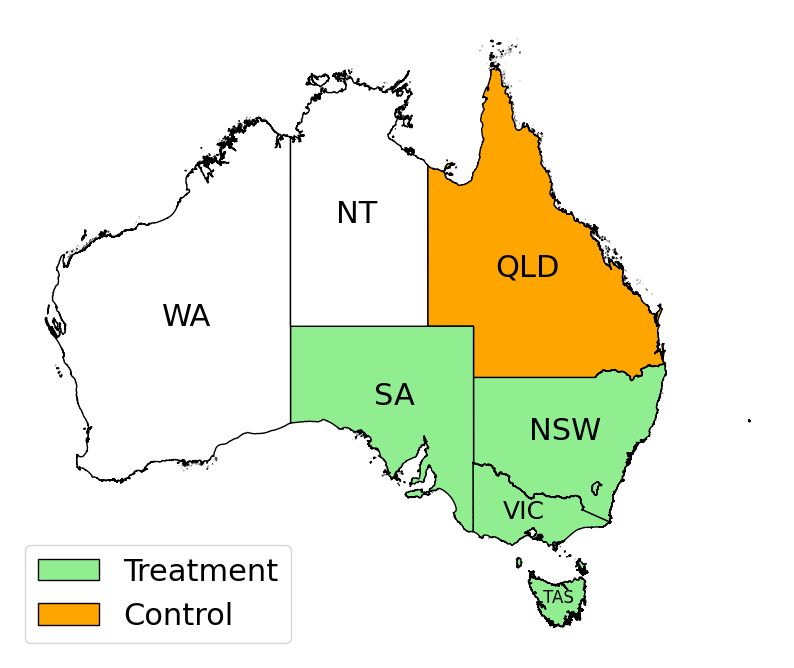

In [8]:

gdf = gpd.read_file(shapefile_path)

# Define colors for each state
control_colour = 'orange'
treatment_colour = 'lightgreen'
ignored_colour = 'white'
states = {
    'Western Australia': {
        'colour': ignored_colour,
        'acronym': 'WA',
    },
    'Northern Territory': {
        'colour': ignored_colour,
        'acronym': 'NT'
    },
    'Queensland': {
        'colour': control_colour,
        'acronym': 'QLD'
    },
    'New South Wales': {
        'colour': treatment_colour,
        'acronym': 'NSW'
    },
    'Victoria': {
        'colour': treatment_colour,
        'acronym': 'VIC'
    },
    'South Australia': {
        'colour': treatment_colour,
        'acronym': 'SA'
    },
    'Tasmania': {
        'colour': treatment_colour,
        'acronym': 'TAS'
    },
    'Australian Capital Territory': {
        'colour': treatment_colour,
        # don't label
    }
}

# Set default color for other states
default_color = 'white'

# filter out small islands
gdf = gdf[gdf['STE_NAME21'] != 'Other Territories']
gdf = gdf[gdf['STE_NAME21'] != 'Outside Australia']

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color=[states[state]['colour'] for state in gdf['STE_NAME21']], edgecolor='black')

# Add state labels
for x, y, state in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['STE_NAME21']):
    if (state in states) and states[state].get('acronym'):
        ac = states[state]['acronym']
        if ac == 'TAS':
            sz = 12
        elif ac == 'VIC':
            sz = 18
        else:
            sz = 22
        ax.text(x, y, ac, fontsize=sz, ha='center', va='center')

# Set plot title
#plt.title("Map of Australia")

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')

legend_elements = [Patch(facecolor=treatment_colour, edgecolor='black', label='Treatment'),
                   Patch(facecolor=control_colour, edgecolor='black', label='Control')]

ax.legend(handles=legend_elements, loc='lower left', prop={'size': 22})


# Display the plot
#plt.show()
# or save it
plt.savefig('plots/map.png', pad_inches=0, bbox_inches='tight', transparent=True)